In [1]:
# 从shiningspectrum中导入pretreatment
from shiningspectrum import pretreatment
#从shiningspectrum中导入database
from shiningspectrum import database
#导入peak_processing
from shiningspectrum import peak_processing
import os
import matplotlib.pyplot as plt
import numpy as np


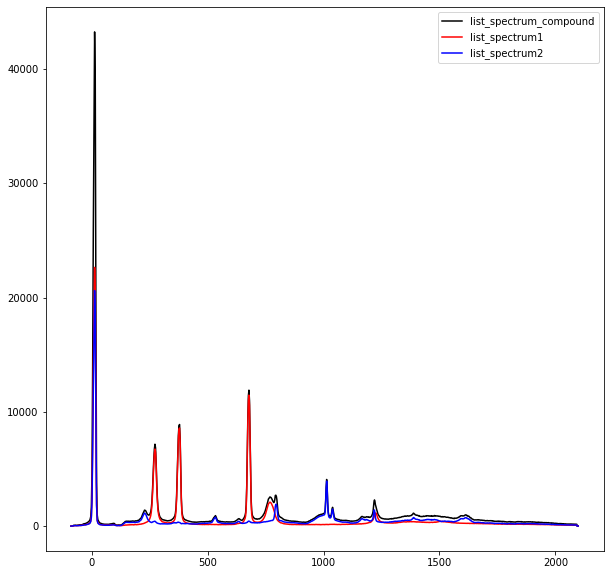

In [2]:
data_path=os.getcwd()+"\\Prepare incoming data"

file_data1 = database.read_file(data_path, "氯仿.txt")
file_data2 = database.read_file(data_path, "甲苯.txt")

list_spectrum1 = database.data_extraction(file_data1)
list_spectrum2 = database.data_extraction(file_data2)

list_spectrum_compound = [list_spectrum1[0],list(np.array(list_spectrum1[1])+np.array(list_spectrum2[1]))]

plt.figure(figsize=(10,10))
plt.plot(list_spectrum_compound[0],list_spectrum_compound[1],"k-",label="list_spectrum_compound")
plt.plot(list_spectrum1[0],list_spectrum1[1],"r-",label="list_spectrum1")

plt.plot(list_spectrum2[0],list_spectrum2[1],"b-",label="list_spectrum2")
plt.legend()

In [3]:

peaks=peak_processing.search_peaks(list_spectrum_compound[0], list_spectrum_compound[1], height=0.1, distance=10)
all_spectrum = database.read_all("raman_database")
peaks_database = peak_processing.search_database_peaks(all_spectrum,height=0.1,distance=10)
coincide_information = peak_processing.compare_peaks(peaks_database,peaks,abs_tol=20)
contain_dict = peak_processing.judge_matter(coincide_information, criterion = 0.99)

In [4]:
peaks

[(12.551, 43268.369999999995),
 (272.827, 7167.37),
 (378.942, 8892.37),
 (678.262, 11899.37),
 (794.282, 2702.37),
 (1013.507, 4079.37),
 (1219.777, 2288.37)]

In [23]:
contain_dict

{}

In [24]:
coincide_information

{'64-17-5': {'coincide_list': [[18.149, 12.551]], 'coincide_number': [7, 1]},
 '67-66-3': {'coincide_list': [[12.551, 12.551],
   [272.827, 272.827],
   [378.942, 378.942],
   [678.262, 678.262],
   [1225.837, 1219.777]],
  'coincide_number': [6, 5]},
 '108-90-7': {'coincide_list': [[12.551, 12.551], [1011.359, 1013.507]],
  'coincide_number': [7, 2]},
 '108-88-3': {'coincide_list': [[12.551, 12.551],
   [796.565, 794.282],
   [1013.507, 1013.507],
   [1219.777, 1219.777]],
  'coincide_number': [7, 4]},
 '108-95-2': {'coincide_list': [[12.551, 12.551], [1009.21, 1013.507]],
  'coincide_number': [8, 2]}}

In [6]:
peaks_database

{'64-17-5': [(18.149, 22369.13),
  (447.26, 550.36),
  (897.829, 4820.16),
  (1064.658, 1620.61),
  (1108.804, 1609.54),
  (1289.808, 841.37),
  (1467.137, 1866.22)],
 '67-66-3': [(12.551, 22647.75),
  (272.827, 6744.75),
  (378.942, 8584.75),
  (678.262, 11466.75),
  (769.073, 2094.75),
  (1225.837, 1147.75)],
 '108-90-7': [(12.551, 13924.75),
  (206.675, 2502.75),
  (427.145, 1640.75),
  (713.457, 1755.75),
  (1011.359, 7008.75),
  (1092.053, 1856.75),
  (1592.257, 896.75)],
 '108-88-3': [(12.551, 20620.62),
  (227.965, 1135.62),
  (534.032, 783.62),
  (796.565, 1903.62),
  (1013.507, 3936.62),
  (1039.176, 1493.62),
  (1219.777, 1406.62)],
 '108-95-2': [(12.551, 14972.0),
  (251.779, 222.0),
  (541.377, 247.0),
  (821.584, 633.0),
  (1009.21, 1057.0),
  (1034.911, 589.0),
  (1179.097, 242.0),
  (1604.863, 254.0)]}